<html style="background-color:powderblue;"><h1>Projet Synthese</h1><br><b>Groupe 3: Amardeep, Hilaire, Jian-Guo, Mamadou</b></html>

<h2>Partie I - Preparation</h2>

<h3>On commence par importer des packages nécessaires</h3)<br> <p>En utilisant <b>tensorflow.compat.v1</b>, vous devez desactiver eager_execution.<br>Ce n'est pas le cas pour <b>tensorflow.v2</b>. De plus, un message d'erreur indiquera que le package <b>tensorflow</b> n'a pas la fonction <b><i>disable_eager_execution</i></b> si vous executez cette ligne.</p>

In [1]:
import tensorflow as tf
#import tensorflow.compat.v1 as tf
#tf.disable_eager_execution()

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D 
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
import numpy as np      # linear algebra
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [3]:
import os
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

In [4]:
from numpy import expand_dims
from keras.preprocessing.image import img_to_array

In [5]:
%matplotlib inline

<h3>Chargement des donnees</h3>
<p>Pour eviter l'operation <b>download</b> des donnees se fait chaque fois, on les sauvegarde dans un repertoire local, qui est differente pour different colaborateurs. Veuillez changez la valeur de variable <b><i>data_dir</i></b> si necessaire</p>

In [6]:
# download the data from web and saved to local directory
# put the data in a variable make the following code usable for any data sources
# Original data is hold by df
data_dir = "C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3\\data\\fer2013.csv"
##data_dir  = "C:\\Users\\Nisha Haulkhory\\Desktop\\projet de synthese\\fer2013.csv"

<h3> Exploration des donnees</h3>

<p>On charge les donnees dans une variable <b><i>df</i></b></p>

In [7]:
# Original data is hold by df
df = pd.read_csv(data_dir )
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [8]:
print(f"Le dataset a {df.shape[0]} lignes et {df.shape[1]} colonnes.")

Le dataset a 35887 lignes et 3 colonnes.


<h3>Pour connaitre la colonne <i>Usage</i></h3> 

In [9]:
split = list(set(df['Usage']))
print(f"Le dataset a comme Usage ces valeurs: {split}")

Le dataset a comme Usage ces valeurs: ['Training', 'PublicTest', 'PrivateTest']


<p>On partage les donnees en 3 parties selons les valeurs d'<b><i>Usage</i></b></P>

In [10]:
df_training = df[df['Usage']=='Training']
df_PublicTest = df[df['Usage']=='PublicTest']
df_PrivateTest = df[df['Usage']=='PrivateTest']

<p>Une répartition des donnees pourrait etre désastreuse si la distribution de la cible est differente pour ces trois parties. Pour savoir si nos trois parties sont bien equilibre, nous allons charger quatre variables pour la distribution de la cible. Un pour les donnees originals, et les autres pour les trois parties</P>

In [11]:
rdf = df.emotion.value_counts(normalize=True)
rdf_training = df_training.emotion.value_counts(normalize=True)
rdf_PublicTest = df_PublicTest.emotion.value_counts(normalize=True)
rdf_PrivateTest = df_PrivateTest.emotion.value_counts(normalize=True)

In [12]:
trainset_keep_same_ratio = all(rdf.index==rdf_training.index)
publicset_keep_same_ratio = all(rdf.index==rdf_PublicTest.index)
privateset_keep_same_ratio = all(rdf.index==rdf_PrivateTest.index)

<p><ul><li>La meilleurs situation est pour le sénario lorsque ces trois parties ont relativement la meme distribution que les données avant la répartition. Si c'est le cas, on affiche une DataFrame de la distribution des cibles pour ces quatre variables</li><li>Si jamais une partie n'a pas la meme distribution que les données originals, on affiche les autres parties dans le DataFrame. Et la distribution de cette partie sera affiche en comparant avec celle des données originals</li><li>Si jamais deux parties ou plus n'ont pas la meme distribution que les donnees originals, on affiche ces quatre distributions séparativement</li></ul></P>

In [13]:
if all([trainset_keep_same_ratio, publicset_keep_same_ratio, privateset_keep_same_ratio]):
    print("\nOn a une relativement bonne partition:")
    print(pd.DataFrame({"origine":rdf.values, "train_set":rdf_training.values, "public_set":rdf_PublicTest.values, "private_set":rdf_PrivateTest.values}, index=rdf.index))
elif all([trainset_keep_same_ratio, privateset_keep_same_ratio]):
    print("\nTrain_set et private_test_set ont relativement la même partition:")
    print(pd.DataFrame({"origine":rdf.values, "train_set":rdf_training.values, "private_set":rdf_PrivateTest.values}, index=rdf.index))
    print("Public_test_set a une partition différente:\nOriginal\n", rdf, "\nPublicTest\n", rdf_PublicTest)
elif all([trainset_keep_same_ratio, publicset_keep_same_ratio]):
    print("\nTrain_set et public_test_set ont relativement la même partition:")
    print(pd.DataFrame({"origine":rdf.values, "train_set":rdf_training.values, "public_set":rdf_PublicTest.values}, index=rdf.index))
    print("Private_test_set a une partition différente:\nOriginal\n", rdf, "\nPrivate Test\n", rdf_PrivateTest)          
elif all([publicset_keep_same_ratio, privateset_keep_same_ratio]):
    print("\nPublic test set and private test set have relatively the same data partition:")
    print(pd.DataFrame({"origine":rdf.values, "PublicTest":rdf_PublicTest.values, "PrivateTest":rdf_PrivateTest.values}, index=rdf.index))
    print("Train_set a une partition différente:\nOriginal\n", rdf, "\nTraining\n", rdf_training)
else:          
    print("La répartition des données ne semble pas être correcte!")
    print("\nOriginal\n", rdf, "\nTraining\n", rdf_training, "PublicTest\n", rdf_PublicTest, "PrivateTest\n", rdf_PrivateTest)


Train_set et private_test_set ont relativement la même partition:
    origine  train_set  private_set
3  0.250481   0.251315     0.244915
6  0.172709   0.172942     0.174422
4  0.169337   0.168240     0.165506
2  0.142698   0.142708     0.147116
0  0.138017   0.139155     0.136807
5  0.111517   0.110453     0.115910
1  0.015242   0.015187     0.015325
Public_test_set a une partition différente:
Original
 3    0.250481
6    0.172709
4    0.169337
2    0.142698
0    0.138017
5    0.111517
1    0.015242
Name: emotion, dtype: float64 
PublicTest
 3    0.249373
4    0.181945
6    0.169128
2    0.138200
0    0.130120
5    0.115631
1    0.015603
Name: emotion, dtype: float64


<p>Nous constatons que:<tr><ol><li>La distribution est relativement bien dans les trois parties</li><li>Les images de categorie 4 sont un peu plus nombreuses dans la partie <b>PublicTest</b> que les données originals</li><li>Mais seulement les catégories 4 et 6 se changent de place. Ceci est tolérable pour une telle répartition</li></p>

<p>Nous allons continuer l'exploration des donnees.<br>On verifie les datatype de donnees, les valeurs manquantes, les valeurs aberantes</p>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1   pixels   35887 non-null  object
 2   Usage    35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


<h3>Pour connaitre la structure des donnees dans la colonne <i>pixels</i></h3>
<p>Une colonne,<b>length</b>, est ajoute qui est le nombre des chiffres sur chaque ligne</P>

In [15]:
df['length'] = df.pixels.apply(lambda x: len(str(x).split(' ')))
df.head()

,emotion,pixels,Usage,length
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,2304
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,2304
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,2304
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,2304
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,2304


<p>Pour verifier si toutes les lignes ont la meme longeur ou s'il y a des valeurs manquantres</P>

In [16]:
normal_length = 2304  
no_data = sum(df.length.isna())
anormal = sum([df.length[i] != normal_length for i in range(df.shape[0])])
print(f"nombre de valeur manquant = {no_data}" if no_data>0 else "pas de valeur manquant!")
print(f"nombre de valeur anormal = {anormal}" if anormal>0 else "pas de valeur anormale!")

pas de valeur manquant!
pas de valeur anormale!


* Nous constatons que Les données n'ont pas de valeur manquante ni de valeur anormale
* La distribution des emotions montre qu'il y a plus de catégorie 3 et moins de catégorie 1

<h3> Pour connaitre la colonne <i>emotion</i></h3>

<p>Par la colonne <b>emotion</b>, qui est la cible, nous voyons une distribution non-uniforme.</P>

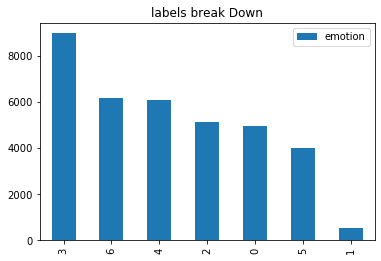

In [17]:
lab = pd.DataFrame(df.emotion.value_counts())
lab.plot.bar(title="labels break Down")

<h3> Conclusion de l'exploration des donnees</h3>
<ul>
    <li>Les données contient essentiellement deux colonnes: <b>emotion</b>, la cible, et <b>pixels</b> qui est l'image 48x48 = 2304</li>
    <li>L'autre colonne, Usage, est une partition des données: <u style="color:blue">Training, PublicTest, PrivateTest</u></li>
    <li>Nous allons utiliser la partie <b>Training</b> pour developpement et <b>PrivateTest</b> pour tester le modele</li>
    <li>La partie <b>PublicTest</b> sera utilisée pour la validation pendant le developpement.</li>
</ul>

<h3>Affichage des donnees</h3>
<p> Ces fonctions sont pour afficher un image (une ligne)<br>Notons que 48 x 48 = 2304</p>

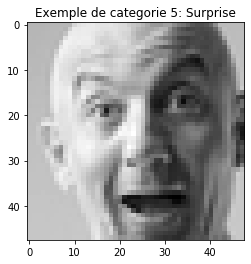

In [18]:
#import numpy as np
#import matplotlib.pyplot as plt

FER2013_WIDTH = 48
FER2013_HEIGHT = 48

# indices 0 - 6 correspondent emotions suivantes
Emotions = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]  

def string_to_image(str_in):
    return np.reshape(str_in.split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")

def fer2013_show_instance(index, d=df):
    """Shows the image and the emotion label of the index's instance."""
    category, str_image = d.at[index,'emotion'], d.at[index,'pixels']
    image = string_to_image(str_image)
    plt.imshow(image, cmap="gray")
    plt.title(f"Exemple de categorie {category}: {Emotions[category]}")
    
fer2013_show_instance(np.random.randint(0,len(df_training)))

<p>Nous voulons aussi savoir les differentes expressions d'emotions pour les sept categories</p>

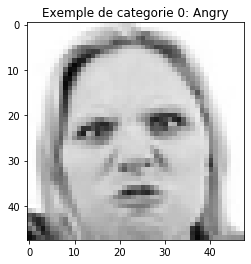

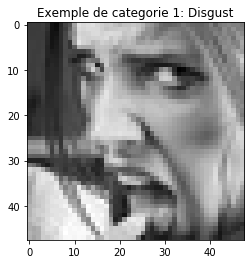

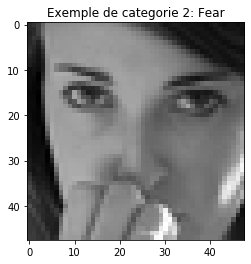

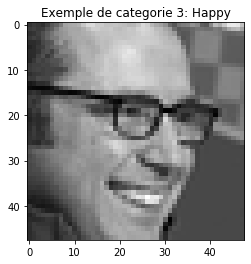

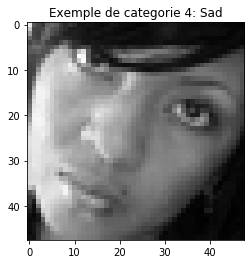

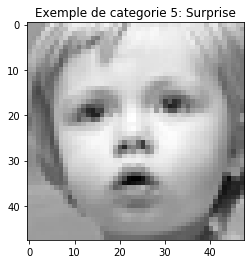

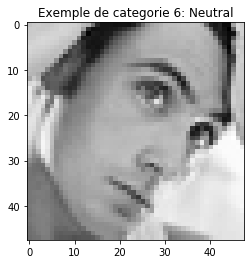

In [19]:
for cat in range(7):
    plt.figure(cat)
    idx = np.random.choice(df.index[df.emotion==cat])
    fer2013_show_instance(idx)
plt.show()

<h3>Fonction de transformation des données.</h3><br><p><ul> La fonction <b><i>fer2013_to_4d_array</i></b> prend comme entree une dataframe qui tienne les donnees d'images en format des chaines de caracteres.<br>Elle retoune comme sortie un <b>np.array</b> de <mark>4 dim</mark>, normalisee, utilisables comme entree pour <b>tensorflow<b></ul></p>

In [20]:
def fer2013_to_4d_array(d=df):
    """Transforms the (blank separated) pixel strings in the DataFrame to an 4-dimensional array 
    (1st dim: instances, 2nd and 3rd dims represent 2D image, 4th dim represent the color)."""
    
    pixels_list = d["pixels"].values
    list_image_2d = [string_to_image(pixels) for pixels in pixels_list]
        
    # Convert list to 4D array:
    X = np.expand_dims(np.array(list_image_2d), -1)
    print(f"The given data <pixel strings> has been converted to {X.shape} array")
    
    return X / 255

<p>On applique la fonction <b><i>fer2013_to_4d_array</i></b> sur les trois partitions</P>

In [21]:
X_train = fer2013_to_4d_array(df_training)
X_test = fer2013_to_4d_array(df_PrivateTest)
X_valid = fer2013_to_4d_array(df_PublicTest)

The given data <pixel strings> has been converted to (28709, 48, 48, 1) array
The given data <pixel strings> has been converted to (3589, 48, 48, 1) array
The given data <pixel strings> has been converted to (3589, 48, 48, 1) array


<h3>Fonction de transformation pour la cible</h3>
<p><ul><li>La fonction <b style="backgroud-color:powerblue"><i>one_hot_label</i></b> prend comme entree une dataframe qui tienne les donnees d'emotions en format categoriel (7 classes).<br>Elle retoune comme sortie un <b>np.array</b> de <mark>2 dim</mark>. Les classes sont reparties en 7 colonnes, une pour chaque, utilisables pour <b>tensorflow<b></li>
    <li><b><mark>keras.utils.to_categorical</mark></b> peut faire le meme travail la sortie est du dtype float32</li>
    </ul>
    </p>

In [22]:
def one_hot_labels(d):
    """Get one-hot encoded labels"""
    return pd.get_dummies(d.emotion).values

Y_train = one_hot_labels(df_training)
Y_test = one_hot_labels(df_PrivateTest)
Y_valid = one_hot_labels(df_PublicTest)
print(Y_train.shape, Y_test.shape, Y_valid.shape)

(28709, 7) (3589, 7) (3589, 7)


In [23]:
Y_train[:5]

array([[1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1]], dtype=uint8)

In [24]:
CLASS_NUMBER = 7
y_train = to_categorical(df_training.emotion, CLASS_NUMBER)
y_test = to_categorical(df_PrivateTest.emotion, CLASS_NUMBER)
y_valid = to_categorical(df_PublicTest.emotion, CLASS_NUMBER)
y_train[:5]

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

<p style="background-color:powderblue;">On verifie simplement si les donnees sont normalise</p>

In [25]:
pd.DataFrame({'max':[np.max(X_train), np.max(X_test), np.max(X_valid)], 
              'mean':[np.mean(X_train), np.mean(X_test), np.mean(X_valid)],
              'min':[np.min(X_train), np.min(X_test), np.min(X_valid)]}, index=['train_set', 'test_set', 'validation_set'])

,max,mean,min
train_set,1.0,0.507743,0.0
test_set,1.0,0.506207,0.0
validation_set,1.0,0.505808,0.0


## The Deep Neural Network
* First, we will define the Convolutional neural networks architecture as follows:
* 1- The first hidden layer is a convolutional layer called a Convolution2D. We will use 32 filters with size 5×5 each.
* 2- Then a Max pooling layer with a pool size of 2×2.
* 3- Another convolutional layer with 64 filters with size 5×5 each.
* 4- Then a Max pooling layer with a pool size of 2×2.
* 5- Then next is a Flatten layer that converts the 2D matrix data to a 1D vector before building the fully connected layers.
* 6- After that we will use a fully connected layer with 1024 neurons and relu activation function.
* 7- Then we will use a regularization layer called Dropout. It is configured to randomly exclude 20% of neurons in the layer in order to reduce overfitting.
* 8- Finally, the output layer which has 10 neurons for the 10 classes and a softmax activation function to output probability-like predictions for each class.

<h2>Partie II Modele d'apprentissage</h2>
<p>Definir le <abbr title="Convolutional Neural Networks"><b>CNN </b></abbr>architecture:</p>
<ol>
<li>La premiere couche, Conv2D, prend un batch de donnees avec input_shape=(48,48,1)</li>
<li>La deuxieme couche, Conv2D, prend la sortie de couche 1, keras determine le shape qui est fonction du nombre de filtres utilises</li>
    <li>La troisieme couche, Conv2D, prend la sortie de la couche 2, keras determine le shape automatiquement</li>
    <li>Ainsi de suite pour les autres couches Conv2D s'il y en a besoin</li>
    <li>Entre chaque deux couches Conv2D, une couche Max pooling, taille (2,2), est ajoutee</li>
    <li>Pour reduire le sur-apprentissage, une couche Dropout pourrait etre ajoutee</li>
    <li>Pour une meilleur performance, une couche Normalisation pourrait etre aussi appliquee</li>
<li>Avant la couche dense, nous allons ajouter une couche Flatten qui convert le matrix 2D en vector 1D</li>
    <li>Une couche Dense avec une fonction activation ReLu</li>
    <li>Encore une couche de regularization Dropout est appliquee</li>
    <li>Enfin, la couche de sortie donne 7 neurons pour les 7 classes avec une fonction activation softmax qui donne la possibilite de prediction pour chaque class.</li>
</ol>

<p><ul>Le constructeur de class <b>Conv2D</b> prend<blockquote cite="http://www.worldwildlife.org/who/index.html">
    <li>un argument <u style="color:red;">‘filter’</u>, qui correspond au nombre de filtres utilisés par la couche neurons, ou le nombre des features. Le chiffre 32 ou 64 dans les codes ci-dessous montre qu'il y 32 filtres sur la première couche et 64 filtres sur la deuxième.</li>
    <li>Un autte argument <u style = "color:red;"> ‘kernel_size’</u>, 5 ou 5x5 dans les codes ci-dessous, qui represent les dimensions de filter (kernel) ou la taille de <u>'receptive field'</u></li>
    <li>On peut changer les valeurs par-defaut des autres hyperparametres (voir la liste ci-dessous).</li>
    </ul></blockquote></p>

<b style="color:blue">tf.keras.layers.Conv2D(</b><br>
    <ul>
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,<br>
    dilation_rate=(1, 1), groups=1, activation=None, use_bias=True,<br>
    kernel_initializer='glorot_uniform', bias_initializer='zeros',<br>
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,<br>
    kernel_constraint=None, bias_constraint=None, **kwargs
    </ul><br>

## Step 1 – Create a model:
* Keras first creates a new instance of a model object and then add layers to it one after the another. It is called a sequential model API. We can add layers to the neural network just by calling model.add and passing in the type of layer we want to add. Finally, we will compile the model with two important information, loss function, and cost optimization algorithm.

In [22]:
# from keras.layers.normalization import BatchNormalization

## Network Parameters
* Next, you need to define the network parameters. Firstly, you define the number of inputs. This is 2304 since the image is initially loaded as a 2304-dimensional vector. Later, you will see that how you will reshape the 2304-dimensional vector to a 48 x 48 x 1 matrix. Secondly, you'll also define the number of classes, which is nothing else than the number of class labels.here 7

<h3>Creation du modele:</h3>
<p>Avec Keras, on cree une instance, model, de l'objet Sequential, puis on y ajoute des couches Coonv2D, une apres une autre. C'est pourquoi il s'appelle Sequential. On ajoute une couche neurone par simplement la fonction model.add() et passe le type de couche que nous voulons ajouter. Finallement, nous passons le model en compilation avec deux informations importantes: loss function, et cost optimization algorithm.</p>

<h3>Modele de la premiere version</h3>
<p>La premiere version contient simplement deux couches Conv2D<br> plus deux couches Dense avec une couche Dropout</p>

In [26]:
# Creating a Sequential Model and adding the layers
input_shape = (48, 48, 1)
model = Sequential()
#first layer
model.add(Conv2D(32, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

#second layer
# input_shape should be the first layer's shape, shouldn't it???
model.add(Conv2D(64, kernel_size=(5,5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(7,activation=tf.nn.softmax))

In [27]:
# Compile the model
# optimizer = 'adam'
# model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<h3>Visualiser du modele</h3>

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 44, 44, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5184)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                331840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)               

<h3>Execute le processu d'apprentissage</h3>

In [28]:
# l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=32, epochs=30)

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 75s 3ms/step - loss: 1.6210 - accuracy: 0.3661 - val_loss: 1.4795 - val_accuracy: 0.4388
Epoch 2/30
28709/28709 [==============================] - 50s 2ms/step - loss: 1.4415 - accuracy: 0.4442 - val_loss: 1.3609 - val_accuracy: 0.4884
Epoch 3/30
28709/28709 [==============================] - 49s 2ms/step - loss: 1.3483 - accuracy: 0.4866 - val_loss: 1.3693 - val_accuracy: 0.4675
Epoch 4/30
28709/28709 [==============================] - 48s 2ms/step - loss: 1.2652 - accuracy: 0.5171 - val_loss: 1.3175 - val_accuracy: 0.4848
Epoch 5/30
28709/28709 [==============================] - 49s 2ms/step - loss: 1.1965 - accuracy: 0.5447 - val_loss: 1.4147 - val_accuracy: 0.4893
Epoch 6/30
28709/28709 [==============================] - 49s 2ms/step - loss: 1.1237 - accuracy: 0.5713 - val_loss: 1.3074 - val_accuracy: 0.5054
Epoch 7/30
28709/28709 [==============================] - 48s 2ms/ste

## Evaluate Model

<p>Une fois l'apprentissage est termine, nous allons evaluer notre modele par les donnees <mark>Test Set</mark> que le modele n'a pas vu avant.</p>

In [31]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

Evaluate on test data
3589/3589 [==============================] - 1s 340us/step
test loss, test acc: [2.960562202717209, 0.500417947769165]


<h3>Visualisation l'histoire d'apprentissage</h3>

In [32]:
l.history

{'val_loss': [1.4795153707008437,
  1.3608581186769133,
  1.3693006038997924,
  1.317479796348491,
  1.4146972192167473,
  1.3073569857732072,
  1.372043533755664,
  1.3734349228937868,
  1.4485426970131385,
  1.492073735077423,
  1.5748000874696053,
  1.6535302346448242,
  1.7026077897211873,
  1.8152911111019088,
  1.8617360845652422,
  1.9459817541711806,
  2.1322002832057185,
  2.336283468974271,
  2.3677809019213636,
  2.490256317613782,
  2.403887202461372,
  2.5823212775323143,
  2.5629336478551408,
  2.6672245023907575,
  2.8423799094000577,
  2.9932600183718114,
  2.9144760441667157,
  2.97535198676151,
  2.8737147286198006,
  3.0690574275314657],
 'val_accuracy': [0.4388408958911896,
  0.48843687772750854,
  0.4675396978855133,
  0.48481470346450806,
  0.4892727732658386,
  0.5054332613945007,
  0.5202006101608276,
  0.5188074707984924,
  0.5015324354171753,
  0.5196433663368225,
  0.5096126794815063,
  0.5032042264938354,
  0.5137921571731567,
  0.49679577350616455,
  0.5087

<p>Nous pouvons voir que l'accuracy pour apprentissage se augmente continuellement meme apres 20 epoque<br>mais celle pour les donnees de validation reste faible et devient stable rapidement.<br>Une signe de sur-apprentissage (over-fitting).</p>

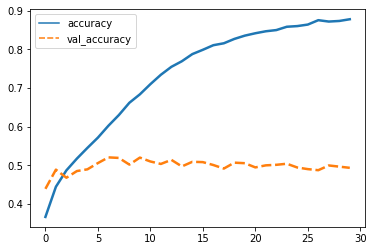

In [33]:
# import seaborn as sns
df_history = pd.DataFrame(l.history)
sns.lineplot(data=df_history[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

<p>Nous allons maintenant voir la performance de modele par la comarison les predictions et les cibles correspondantes</p>

In [34]:
# load test data and make prediction
y_pred = model.predict(X_test)

In [35]:
# convert prediction to df
submission = pd.DataFrame(data=y_pred)

# set label as the 0-6 class with highest value 
submission['Label'] = submission.idxmax(axis=1)
# submission['ImageId'] = np.asarray([i+1 for i in range(submission.shape[0])])

<p>Probabilite de prediction pour chaque image</p>

In [36]:
submission.head().round(4)

,0,1,2,3,4,5,6,Label
0,0.1614,0.0014,0.0315,0.3943,0.0665,0.0534,0.2915,3
1,0.0069,0.0000,0.0270,0.0000,0.9521,0.0001,0.0138,4
2,0.6586,0.0000,0.0082,0.3326,0.0006,0.0000,0.0000,0
3,0.0389,0.0004,0.0759,0.0268,0.3111,0.0002,0.5466,6
4,0.0435,0.0000,0.9439,0.0000,0.0119,0.0000,0.0007,2


<p>Le matrix de confusion est

In [37]:
# from sklearn.metrics import confusion_matrix
cm = confusion_matrix(submission['Label'], df_PrivateTest['emotion'])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

<p>Par analyse de confusion_matrix, nous allons voir que:
<ol>
    <li>Les chiffres sur le diagonal sont les plus eleves qui est bonne nouvelle. </li>
    <li>Categorie 0(angry) est plus facile a melange avec 2(fear), 4(sad) et 3(happy)</li>
    <li>Categorie 1(disquest) est plus facile a melange avec 0(angry), 2(fear) et 4(sad)</li>
    <li>Categorie 2(fear) est plus facile a melange avec 4(sad), 0(angry), et 5(surprise)</li>
    <li>Categorie 3(happy) est plus facile a melange avec 0(angry), 6(neutre), et 4(sad)</li>
    <li>Categorie 4(sad) est plus facile a melange avec 2(fear), 0(angry), et 6(neutral)</li>
    <li>Categorie 5(surprise) est plus facile a melange avec 2(fear), 3(happy), et 0(angry)</li>
    <li>Categorie 6(fear) est plus facile a melange avec 4(sad), 0(angry), et 3(happy)</li>
</ol>
</p>

In [29]:
def show_confusion_matrix(model):
    submission = pd.DataFrame(model.predict(X_test))
    submission['label'] = submission.idxmax(axis=1)
    #y_pred = submission['label']
    #y_real = df_PrivateTest['emotion']
    cm = confusion_matrix(submission['label'], df_PrivateTest['emotion'])
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = cm.round(2)
    return pd.DataFrame(cm)

In [38]:
cm = cm.round(2)
print(pd.DataFrame(cm))

      0     1     2     3     4     5     6
0  0.38  0.02  0.15  0.12  0.18  0.03  0.11
1  0.07  0.66  0.07  0.03  0.03  0.03  0.10
2  0.15  0.01  0.36  0.08  0.18  0.11  0.11
3  0.05  0.01  0.05  0.70  0.08  0.03  0.08
4  0.13  0.01  0.15  0.10  0.34  0.04  0.22
5  0.06  0.01  0.11  0.06  0.05  0.66  0.05
6  0.11  0.00  0.09  0.10  0.17  0.03  0.51


<h2>Deploiement du modele</h2)<br>
<p>Nous allons sauvegarder ce modele pour la utiliser dans notre processure de deploiement<br>
Nous allons continuer la recherche des hyperparametres pour la performance du modele</p>

In [39]:
# serialize model to JSON
model_json = model.to_json()
projet_dir = "C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3"
model_filename = 'fer.json'
with open(os.path.join(projet_dir, model_filename), "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
# model.save_weights("C:\\Users\\Nisha Haulkhory\\projet de synthese\\GIT\\ProSyn3\\fer.h5")
weight_filename = 'fer.h5'
model.save_weights(os.path.join(projet_dir, weight_filename))
print("Saved model to disk")

Saved model to disk


<h3>Deuxieme version</h3>
<p>Nous nous concentrons sur le probleme de sur-apprentissage par ajustement des parametres<br>
Le pipeline est essentiellement:<br><ul>
    <li>Construire un modele</li>
    <li>Visualiser et approver le modele</li>
    <li>Apprendre ce modele</li>
    <li>Afficher la performance du modele</li>
    <li>Sauvegarder le modele</li>
</ul>
La fonction <b><mark>get_model</mark></b> est definie pour la construction du model<br>
La fonction <b><mark>save_model</mark></b> est definie pour la sauvegarder
</p>

In [30]:
# Creating a Sequential Model and adding the layers
input_shape = (48, 48, 1)

def get_model(num_layers=2, num_filtre=(32, 64), k_size=(5, 5), p_size=(2,2), dropout=((0,1),(0.5, 0.5))):
    model = Sequential()
    for layer in range(num_layers): 
        if layer == 0:
            model.add(Conv2D(num_filtre[layer], kernel_size=k_size[layer], input_shape=input_shape))
        else:
            model.add(Conv2D(num_filtre[layer], kernel_size=k_size[layer]))
        model.add(MaxPooling2D(pool_size=p_size))
        if (len(dropout[0]) > 0) and (layer in dropout[0]):  # if specified, add Dropout layer for the Conv2D layer
            model.add(Dropout(dropout[1][layer]))

    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(7,activation=tf.nn.softmax))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [31]:
def save_model(model, file_json="", file_weight="", workdir="C:\\Users\\jeang\\Documents\\BDEB\\A62\\ProSyn3"):
    # serialize model to JSON
    model_json = model.to_json()
    projet_dir = workdir
    model_filename = 'fer.json' if file_json=="" else file_json
    with open(os.path.join(projet_dir, model_filename), "w") as json_file:
        json_file.write(model_json)

    # serialize weights to HDF5
    # model.save_weights("C:\\Users\\Nisha Haulkhory\\projet de synthese\\GIT\\ProSyn3\\fer.h5")
    weight_filename = 'fer.h5' if file_weight=="" else file_weight
    model.save_weights(os.path.join(projet_dir, weight_filename))
    print("Saved model to disk")

In [43]:
model = get_model()

In [44]:
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 44, 44, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5184)             

In [45]:
l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=32, epochs=30)

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 51s 2ms/step - loss: 1.7415 - accuracy: 0.3009 - val_loss: 1.5719 - val_accuracy: 0.3979
Epoch 2/30
28709/28709 [==============================] - 51s 2ms/step - loss: 1.6246 - accuracy: 0.3607 - val_loss: 1.5040 - val_accuracy: 0.4182
Epoch 3/30
28709/28709 [==============================] - 54s 2ms/step - loss: 1.5824 - accuracy: 0.3821 - val_loss: 1.5055 - val_accuracy: 0.4241
Epoch 4/30
28709/28709 [==============================] - 52s 2ms/step - loss: 1.5457 - accuracy: 0.3980 - val_loss: 1.4157 - val_accuracy: 0.4522
Epoch 5/30
28709/28709 [==============================] - 53s 2ms/step - loss: 1.5155 - accuracy: 0.4080 - val_loss: 1.4154 - val_accuracy: 0.4556
Epoch 6/30
28709/28709 [==============================] - 51s 2ms/step - loss: 1.4937 - accuracy: 0.4192 - val_loss: 1.3859 - val_accuracy: 0.4700
Epoch 7/30
28709/28709 [==============================] - 52s 2ms/ste

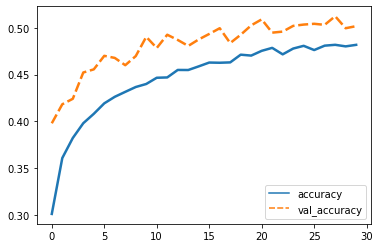

In [46]:
sns.lineplot(data=pd.DataFrame(l.history)[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

In [49]:
save_model(model, file_json="ferv2.json", file_weight="ferv2.h5")

Saved model to disk


<h3>Troisieme version</h3>
<ul><li>Par la version 2, le probleme de sur-apprentissage est largement regle</li>
<li>Pour la version 2, la performance (accuracy) est fable pour les donnees d'apprentissage</li>
    <li>Pour la version 3, nous allons concentrer sur l'augmentation de la performance</li></ul>

In [51]:
model = get_model(num_layers=2, num_filtre=(64, 64), k_size=(3, 3), p_size=(2, 2), dropout=((0,1),(0.25, 0.25)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)             

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 66s 2ms/step - loss: 1.6449 - accuracy: 0.3505 - val_loss: 1.4866 - val_accuracy: 0.4269
Epoch 2/30
28709/28709 [==============================] - 66s 2ms/step - loss: 1.4614 - accuracy: 0.4351 - val_loss: 1.3780 - val_accuracy: 0.4698
Epoch 3/30
28709/28709 [==============================] - 65s 2ms/step - loss: 1.3798 - accuracy: 0.4684 - val_loss: 1.3485 - val_accuracy: 0.4862
Epoch 4/30
28709/28709 [==============================] - 66s 2ms/step - loss: 1.3127 - accuracy: 0.4928 - val_loss: 1.3332 - val_accuracy: 0.4929
Epoch 5/30
28709/28709 [==============================] - 65s 2ms/step - loss: 1.2510 - accuracy: 0.5227 - val_loss: 1.3314 - val_accuracy: 0.5015
Epoch 6/30
28709/28709 [==============================] - 65s 2ms/step - loss: 1.2043 - accuracy: 0.5416 - val_loss: 1.3544 - val_accuracy: 0.4974
Epoch 7/30
28709/28709 [==============================] - 65s 2ms/ste

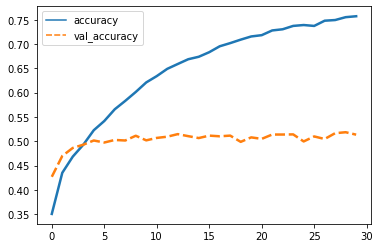

In [52]:
l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=32, epochs=30)
sns.lineplot(data=pd.DataFrame(l.history)[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
save_model(model, file_json="ferv3.json", file_weight="ferv3.h5")

<h3> Quatrieme version</h3>
<ul><li>Par la version 3, le probleme de faible performance n'est pas regle</li>
<li>Pour la version 3, le probleme de sur-apprentissage est revenu</li>
<li>Pour la version 4, nous allons ajouter une fonction activation <b><mark>ReLu</mark></b> et normalizer les donnees pour chaque couche</li></ul>

In [26]:
def get_model_v2(num_layers=3, num_filtre=(32, 64, 64), k_size=(3, 3, 3), p_size=(2, 2), dropout=((0,1,2),(0.25, 0.25, 0.25))):
    input_shape = (48, 48, 1)
    model = Sequential()
    for layer in range(num_layers): 
        if layer == 0:
            model.add(Conv2D(num_filtre[layer], kernel_size=k_size[layer], activation=tf.nn.relu, padding="same", input_shape=input_shape))
        else:
            model.add(Conv2D(num_filtre[layer], kernel_size=k_size[layer], activation=tf.nn.relu, padding="same"))
        
        model.add(MaxPooling2D(pool_size=p_size))
        model.add(BatchNormalization())

        if (len(dropout[0]) > 0) and (layer in dropout[0]):  # if specified, add Dropout layer for the Conv2D layer
            model.add(Dropout(dropout[1][layer]))

    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(7,activation=tf.nn.softmax))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [54]:
model = get_model_v2()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)       

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 68s 2ms/step - loss: 1.6833 - accuracy: 0.3336 - val_loss: 1.5278 - val_accuracy: 0.4115
Epoch 2/30
28709/28709 [==============================] - 71s 2ms/step - loss: 1.4893 - accuracy: 0.4180 - val_loss: 1.4675 - val_accuracy: 0.4369
Epoch 3/30
28709/28709 [==============================] - 68s 2ms/step - loss: 1.4002 - accuracy: 0.4581 - val_loss: 1.3163 - val_accuracy: 0.4820
Epoch 4/30
28709/28709 [==============================] - 69s 2ms/step - loss: 1.3440 - accuracy: 0.4866 - val_loss: 1.3295 - val_accuracy: 0.4776
Epoch 5/30
28709/28709 [==============================] - 69s 2ms/step - loss: 1.2924 - accuracy: 0.5045 - val_loss: 1.2440 - val_accuracy: 0.5155
Epoch 6/30
28709/28709 [==============================] - 69s 2ms/step - loss: 1.2438 - accuracy: 0.5246 - val_loss: 1.3325 - val_accuracy: 0.5035
Epoch 7/30
28709/28709 [==============================] - 69s 2ms/ste

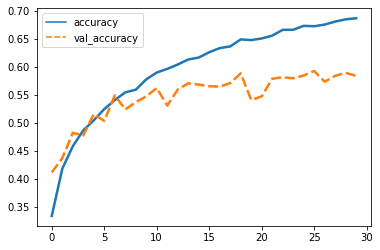

In [55]:
l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=32, epochs=30)
sns.lineplot(data=pd.DataFrame(l.history)[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
save_model(model, file_json="ferv4.json", file_weight="ferv4.h5")

<h3> Cinqieme version</h3>
<ul><li>Par la version 4, la performance est monte 0.58 contre 0.51</li>
<li>Pour la version 4, le probleme de sur-apprentissage exist encore</li>
<li>Pour la version 5, nous allons ajouter simplement une couche de plus</li></ul>

In [56]:
model = get_model_v2(num_layers=4, num_filtre=(32, 64, 64, 128), k_size=(3, 3, 3, 3), p_size=(2, 2), dropout=((0,1,2,3),(0.25, 0.25, 0.25, 0.25)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 12, 12, 64)       

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 76s 3ms/step - loss: 1.7279 - accuracy: 0.3137 - val_loss: 1.5614 - val_accuracy: 0.3968
Epoch 2/30
28709/28709 [==============================] - 74s 3ms/step - loss: 1.4973 - accuracy: 0.4200 - val_loss: 1.4374 - val_accuracy: 0.4475
Epoch 3/30
28709/28709 [==============================] - 75s 3ms/step - loss: 1.3906 - accuracy: 0.4644 - val_loss: 1.2932 - val_accuracy: 0.4965
Epoch 4/30
28709/28709 [==============================] - 75s 3ms/step - loss: 1.3258 - accuracy: 0.4913 - val_loss: 1.2593 - val_accuracy: 0.5121
Epoch 5/30
28709/28709 [==============================] - 73s 3ms/step - loss: 1.2739 - accuracy: 0.5138 - val_loss: 1.2377 - val_accuracy: 0.5235
Epoch 6/30
28709/28709 [==============================] - 73s 3ms/step - loss: 1.2277 - accuracy: 0.5348 - val_loss: 1.2754 - val_accuracy: 0.5096
Epoch 7/30
28709/28709 [==============================] - 74s 3ms/ste

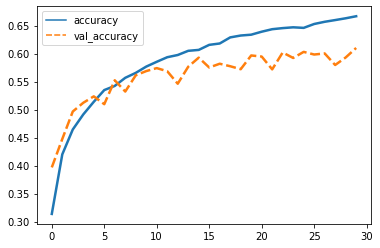

In [57]:
l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=32, epochs=30)
sns.lineplot(data=pd.DataFrame(l.history)[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
save_model(model, file_json="ferv5.json", file_weight="ferv5.h5")

<h3> Sixieme version</h3>
<ul><li>Par la version 5 la performance est encore ameliore 0.60 contre 0.58</li>
<li>Pour la version 5, le probleme de sur-apprentissage exist encore</li>
<li>Pour la version 6, nous allons tune le nombre de filtre et ajouter une couche de plus</li></ul>

In [59]:
model = get_model_v2(num_layers=5, num_filtre=(256, 128, 128, 64, 32), k_size=(3, 3, 3, 3, 3), p_size=(2, 2), dropout=((0, 1, 2, 3, 4), (0.25, 0.25, 0.25, 0.25, 0.25)))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 48, 48, 256)       2560      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 24, 24, 256)       0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 256)       1024      
_________________________________________________________________
dropout_23 (Dropout)         (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 128)       295040    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 12, 12, 128)      

In [ ]:
l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=32, epochs=30)
sns.lineplot(data=pd.DataFrame(l.history)[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
save_model(model, file_json="ferv6.json", file_weight="ferv6.h5")

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 513s 18ms/step - loss: 1.8143 - accuracy: 0.2542 - val_loss: 1.6788 - val_accuracy: 0.3084
Epoch 2/30
28709/28709 [==============================] - 507s 18ms/step - loss: 1.5712 - accuracy: 0.3819 - val_loss: 1.5742 - val_accuracy: 0.3806
Epoch 3/30
28709/28709 [==============================] - 503s 18ms/step - loss: 1.4171 - accuracy: 0.4535 - val_loss: 1.3188 - val_accuracy: 0.4887
Epoch 4/30
28709/28709 [==============================] - 503s 18ms/step - loss: 1.3350 - accuracy: 0.4928 - val_loss: 1.2744 - val_accuracy: 0.5001
Epoch 5/30
28709/28709 [==============================] - 501s 17ms/step - loss: 1.2705 - accuracy: 0.5170 - val_loss: 1.2234 - val_accuracy: 0.5280
Epoch 6/30
28709/28709 [==============================] - 501s 17ms/step - loss: 1.2269 - accuracy: 0.5342 - val_loss: 1.2233 - val_accuracy: 0.5286
Epoch 7/30
28709/28709 [==============================] -

<h3> Septiieme version</h3>
<ul><li>Lors de l'exécusion de la version 6 une erruer était glissée et forcer l'arrêt de l'exécusion.</li>
<li>Par la version 6, la performance était mieux encore: 0.58 contre 0.56 à 5eme version epoch 10.</li>
    <li>Le probleme de la version 6 est le temps d'apprentissage: envirion 8x plus longuer que la version 5</li>
<li>Pour la version 7, nous allons tune le nombre de filtres sans rajou de nouvelle couche</li></ul>

In [27]:
model = get_model_v2(num_layers=5, num_filtre=(128, 64, 128, 64, 32), k_size=(3, 3, 3, 3, 3), p_size=(2, 2), dropout=((0, 1, 2, 3, 4), (0.25, 0.25, 0.25, 0.25, 0.25)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 128)       1280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 64)       

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 210s 7ms/step - loss: 1.8239 - accuracy: 0.2466 - val_loss: 1.6955 - val_accuracy: 0.3149
Epoch 2/30
28709/28709 [==============================] - 213s 7ms/step - loss: 1.5972 - accuracy: 0.3727 - val_loss: 1.6055 - val_accuracy: 0.3904
Epoch 3/30
28709/28709 [==============================] - 209s 7ms/step - loss: 1.4446 - accuracy: 0.4429 - val_loss: 1.3913 - val_accuracy: 0.4592
Epoch 4/30
28709/28709 [==============================] - 207s 7ms/step - loss: 1.3637 - accuracy: 0.4756 - val_loss: 1.2895 - val_accuracy: 0.4985
Epoch 5/30
28709/28709 [==============================] - 210s 7ms/step - loss: 1.3060 - accuracy: 0.5018 - val_loss: 1.2683 - val_accuracy: 0.5099
Epoch 6/30
28709/28709 [==============================] - 210s 7ms/step - loss: 1.2548 - accuracy: 0.5227 - val_loss: 1.1790 - val_accuracy: 0.5464
Epoch 7/30
28709/28709 [==============================] - 209s 

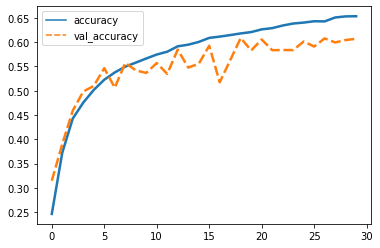

In [28]:
l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=32, epochs=30)
sns.lineplot(data=pd.DataFrame(l.history)[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
save_model(model, file_json="ferv7.json", file_weight="ferv7.h5")

In [32]:
def fit_show_save_model(model, bs=32, ep=30, fnm='fer.json', fnw='fer.h5'):
    l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=bs, epochs=ep)
    sns.lineplot(data=pd.DataFrame(l.history)[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
    save_model(model, file_json=fnm, file_weight=fnw)

<h3> Huitieme version</h3>
<ul><li>La version 7 amene une plus haute performance: 0.6 pour val_accuracy.</li>
<li>La performance était relativement stable apres epoch 20.</li>
<li>Nous devons continue avec la version 6 malgre temps d'apprentissage</li>
<li>Pour la version 8, nous allons choisi le nombre de filtres resemble a la version 6</li></ul>

In [30]:
model = get_model_v2(num_layers=5, num_filtre=(256, 64, 128, 64, 32), k_size=(3, 3, 3, 3, 3), p_size=(2, 2), dropout=((0, 1, 2, 3, 4), (0.25, 0.25, 0.25, 0.25, 0.25)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 256)       2560      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 256)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 256)       1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        147520    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 12, 12, 64)       

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 415s 14ms/step - loss: 1.8414 - accuracy: 0.2366 - val_loss: 1.8629 - val_accuracy: 0.1981
Epoch 2/30
28709/28709 [==============================] - 408s 14ms/step - loss: 1.6815 - accuracy: 0.3188 - val_loss: 1.5462 - val_accuracy: 0.3940
Epoch 3/30
28709/28709 [==============================] - 403s 14ms/step - loss: 1.4923 - accuracy: 0.4196 - val_loss: 1.5112 - val_accuracy: 0.4338
Epoch 4/30
28709/28709 [==============================] - 399s 14ms/step - loss: 1.3774 - accuracy: 0.4710 - val_loss: 1.2723 - val_accuracy: 0.5077
Epoch 5/30
28709/28709 [==============================] - 397s 14ms/step - loss: 1.3058 - accuracy: 0.5017 - val_loss: 1.2645 - val_accuracy: 0.5149
Epoch 6/30
28709/28709 [==============================] - 398s 14ms/step - loss: 1.2565 - accuracy: 0.5229 - val_loss: 1.1921 - val_accuracy: 0.5372
Epoch 7/30
28709/28709 [==============================] -

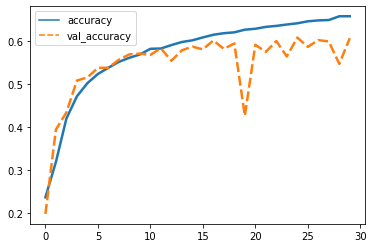

In [31]:
fit_show_save_model(model, fnm='ferv8.json', fnw='ferv8.h5')

<h3> neuvieme version</h3>
<ul><li>Pour la version 8, la performance reste environ 0.6 pour val_accuracy.</li>
<li>La performance était relativement stable apres epoch 17.</li>
<li>Avec la version 8, le temps d'apprentissage est assez longue 4h pour 30 epoch</li>
<li>Pour la version 9, le nombre de filtres se augmente encore malgre le temps</li>
<li>Pour la version 9, nous enleve normalisation</li></ul>

In [32]:
def get_model_v9(num_layers=5, num_filtre=(512, 128, 64, 64, 32), k_size=(3, 3, 3, 3, 3), p_size=(2, 2), dropout=(0.25, 0.25, 0.25, 0.25, 0.25)):
    input_shape = (48, 48, 1)
    model = Sequential()
    for layer in range(num_layers): 
        if layer == 0:
            model.add(Conv2D(num_filtre[layer], kernel_size=k_size[layer], activation=tf.nn.relu, padding="same", input_shape=input_shape))
        else:
            model.add(Conv2D(num_filtre[layer], kernel_size=k_size[layer], activation=tf.nn.relu, padding="same"))
        
        model.add(MaxPooling2D(pool_size=p_size))
        # model.add(BatchNormalization())

        # if (len(dropout[0]) > 0) and (layer in dropout[0]):  # if specified, add Dropout layer for the Conv2D layer
        model.add(Dropout(dropout[layer]))

    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dropout(0.25))
    model.add(Dense(7,activation=tf.nn.softmax))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [34]:
model = get_model_v9()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 512)       5120      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 24, 24, 512)       0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 512)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 24, 24, 128)       589952    
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 64)       

Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 633s 22ms/step - loss: 1.8256 - accuracy: 0.2472 - val_loss: 1.8118 - val_accuracy: 0.2494
Epoch 2/30
28709/28709 [==============================] - 619s 22ms/step - loss: 1.8083 - accuracy: 0.2510 - val_loss: 1.7910 - val_accuracy: 0.2494
Epoch 3/30
28709/28709 [==============================] - 595s 21ms/step - loss: 1.7589 - accuracy: 0.2740 - val_loss: 1.6729 - val_accuracy: 0.3232
Epoch 4/30
28709/28709 [==============================] - 593s 21ms/step - loss: 1.6763 - accuracy: 0.3212 - val_loss: 1.5805 - val_accuracy: 0.3806
Epoch 5/30
28709/28709 [==============================] - 593s 21ms/step - loss: 1.5975 - accuracy: 0.3651 - val_loss: 1.5311 - val_accuracy: 0.3945
Epoch 6/30
28709/28709 [==============================] - 594s 21ms/step - loss: 1.5390 - accuracy: 0.3979 - val_loss: 1.4388 - val_accuracy: 0.4302
Epoch 7/30
28709/28709 [==============================] -

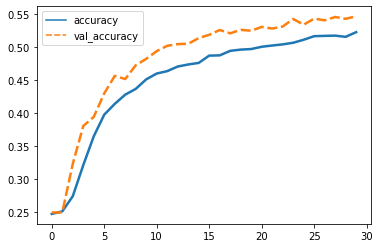

In [36]:
fit_show_save_model(model, fnm='ferv9.json', fnw='ferv9.h5')

In [37]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, Y_test)
print("test loss, test acc:", results)

Evaluate on test data
3589/3589 [==============================] - 20s 5ms/step
test loss, test acc: [1.1898248776913884, 0.5449985861778259]


In [33]:
def fit_test_save_model(model, bs=32, ep=30, fnm='fer.json', fnw='fer.h5'):
    print("Fitting the model with train set and validation set ...")
    l = model.fit(x=X_train, y=Y_train, validation_data = (X_valid, Y_valid), batch_size=bs, epochs=ep)
    sns.lineplot(data=pd.DataFrame(l.history)[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);
    save_model(model, file_json=fnm, file_weight=fnw)
    print("Evaluating the model on test data ...")
    results = model.evaluate(X_test, Y_test)
    print("test loss, test acc:", results)

In [36]:
def get_model_v10(num_layers=6, num_filtre=(512, 128, 64, 64, 32, 16), k_size=3, p_size=(2, 2), dropout=0.25):
    input_shape = (48, 48, 1)
    model = Sequential()
    for layer in range(num_layers): 
        if layer == 0:
            model.add(Conv2D(num_filtre[layer], kernel_size=k_size, activation=tf.nn.relu, padding="same", input_shape=input_shape))
        else:
            model.add(Conv2D(num_filtre[layer], kernel_size=k_size, activation=tf.nn.relu, padding="same"))
            model.add(MaxPooling2D(pool_size=p_size))
            model.add(BatchNormalization())
            model.add(Dropout(dropout))

    model.add(Flatten())                          # Flattening the 2D arrays for fully connected layers
    model.add(Dense(32, activation=tf.nn.relu))
    model.add(Dropout(dropout))
    model.add(Dense(7,activation=tf.nn.softmax))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [37]:
model = get_model_v10()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 512)       5120      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 48, 48, 128)       589952    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 128)       0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)       

In [ ]:
fit_test_save_model(model, bs=32, ep=30, fnm='fer10.json', fnw='fer10.h5')

Fitting the model with train set and validation set ...
Train on 28709 samples, validate on 3589 samples
Epoch 1/30
 4704/28709 [===>..........................] - ETA: 19:54 - loss: 1.9851 - accuracy: 0.1973

## Data Augmentation

In [46]:
# data augmentation
# from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)

In [47]:
L1 = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=32), epochs = 30, 
                                  validation_data = (X_valid, Y_valid), verbose = 1, 
                                  steps_per_epoch = X_train.shape[0] / 100,)

Epoch 1/20
288/287 [==============================] - 23s 80ms/step - loss: 1.9733 - accuracy: 0.1472 - val_loss: 1.8552 - val_accuracy: 0.1819
Epoch 2/20
288/287 [==============================] - 24s 84ms/step - loss: 1.8374 - accuracy: 0.2287 - val_loss: 1.8262 - val_accuracy: 0.2494
Epoch 3/20
288/287 [==============================] - 23s 81ms/step - loss: 1.8176 - accuracy: 0.2497 - val_loss: 1.8181 - val_accuracy: 0.2494
Epoch 4/20
288/287 [==============================] - 23s 80ms/step - loss: 1.8170 - accuracy: 0.2527 - val_loss: 1.8145 - val_accuracy: 0.2494
Epoch 5/20
288/287 [==============================] - 25s 88ms/step - loss: 1.8118 - accuracy: 0.2531 - val_loss: 1.8131 - val_accuracy: 0.2494
Epoch 6/20
288/287 [==============================] - 25s 87ms/step - loss: 1.8121 - accuracy: 0.2502 - val_loss: 1.8126 - val_accuracy: 0.2494
Epoch 7/20
288/287 [==============================] - 24s 84ms/step - loss: 1.8123 - accuracy: 0.2490 - val_loss: 1.8120 - val_accuracy:

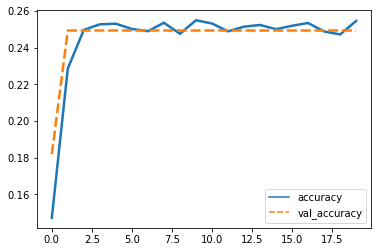

In [48]:
# import seaborn as sns
df_history1 = pd.DataFrame(L1.history)
sns.lineplot(data=df_history1[['accuracy','val_accuracy']], palette="tab10", linewidth=2.5);

In [49]:
# example of horizontal flip image augmentation
#from numpy import expand_dims
#from keras.preprocessing.image import img_to_array
# from matplotlib import pyplot
# convert to numpy array

Neutral


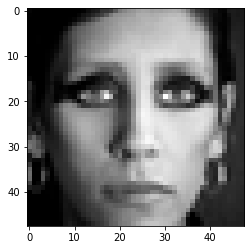

In [50]:

image_sample = np.reshape(df_training.at[4, "pixels"].split(" "), (FER2013_WIDTH, FER2013_HEIGHT)).astype("float")
plt.imshow(image_sample, cmap="gray")
print(Emotions[df_training.at[4, "emotion"]])

In [51]:
image_sample= image_sample.reshape(-1, 48, 48, 1)
image_sample.shape

(1, 48, 48, 1)

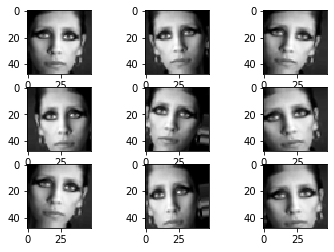

In [53]:
# create image data augmentation generator
datagen = ImageDataGenerator(featurewise_center=False,
                        featurewise_std_normalization=False,
                        rotation_range=10,
                        width_shift_range=0.1,
                        height_shift_range=0.1,
                        zoom_range=.1,
                        horizontal_flip=True,
                        vertical_flip=False)
# prepare iterator
it = datagen.flow(image_sample, batch_size=1)
# generate samples and plot
image =[]
for i in range(9):
    # pyplot.subplot(330 + 1 + i)
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8').reshape(48,48)
    plt.imshow(image,cmap="gray")
plt.show()

In [18]:
# Creating a Sequential Model and adding the layers
input_shape = (48, 48, 1)
DROPOUT = 0.5
KERNELSIZE = (3, 3)
POOLING_SIZE = (2, 2)
model = Sequential()

#first layer
model.add(Conv2D(64, kernel_size=KERNELSIZE, activation=tf.nn.relu, input_shape=input_shape, padding="same", name='Conv2D_1'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=POOLING_SIZE))

#second layer
# input_shape should be the first layer's shape, shouldn't it???
model.add(Conv2D(64, kernel_size=KERNELSIZE, activation=tf.nn.relu, padding="same", name='Conv2D_2'))    # , input_shape=input_shape))
#model.add(BatchNormalization())
model.add(Dropout(DROPOUT))
model.add(MaxPooling2D(pool_size=POOLING_SIZE))

#third layer
# Can we simply add a layer like this???
model.add(Conv2D(64, kernel_size=KERNELSIZE, activation=tf.nn.relu, padding="same", name='Conv2D_3'))   #, input_shape=input_shape))
#model.add(BatchNormalization())
model.add(Dropout(DROPOUT))
model.add(MaxPooling2D(pool_size=POOLING_SIZE))

#fourth layer
# Can we simply add a layer like this???
model.add(Conv2D(64, kernel_size=KERNELSIZE, activation=tf.nn.relu, padding="same", name='Conv2D_4'))   #, input_shape=input_shape))
#model.add(BatchNormalization())
model.add(Dropout(DROPOUT))
model.add(MaxPooling2D(pool_size=POOLING_SIZE))

#fifth layer
# Can we simply add a layer like this???
#model.add(Conv2D(64, kernel_size=KERNELSIZE, activation=tf.nn.relu, padding="same", name='Conv2D_5'))   #, input_shape=input_shape))
#model.add(BatchNormalization())
#model.add(Dropout(DROPOUT))
#model.add(MaxPooling2D(pool_size=POOLING_SIZE))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(225, activation=tf.nn.relu))
# model.add(Dense(64, activation=tf.nn.relu))
model.add(Dropout(DROPOUT))
model.add(BatchNormalization())
model.add(Dense(7, activation=tf.nn.softmax))